# DECISION TREE CLASSIFIER

### [My youtube channel](https://www.youtube.com/channel/UCQf9BYcqr8pzKrY14ZyMsbg?view_as=subscriber)

**Decision Tree** is a supervised learning algorithm, that is basically a tress like structured classifier. It is used to deal with both classification and regression problems in machine learning. You can also think of a decision tree as a machine learning algorithm that uses a decision tree to make predictions, you can think of it as so when you are using the term in machine learning land.

Main parts of a decision tree include:

- Decision nodes
    - Parent node
    - Child node
- Leaf nodes

We will go over each of this in detail but first lets look at an example of a situation where decision tree can be applied. Using this example we will look at each of the parts of a decision tree I mentioned earlier.

Take an example, you are cleaning your garage and in the process you found some item, you are in a dilemma as to keep the item or get rid of it. So you must make a decisions, so you ask yourself certain questions like, do I still need this? Is it valuable? and from there you can decised whether to keep it or not. The thought process can be represented in a decision tree just like the one below.

![Decision Tree Image](https://cdn-images-1.medium.com/max/800/1*6Wc-lqp4EeNVRRgNlmwELA.png)


Your first thought is does the item have some value basing on your feeling(sentimental value), if you feel like its valuable you keep it. What if you don't think its valuable? You ask another question, do you need it in the future? if yes then you keep it. What if you don't think you need it in the future. Maybe its expensive, if it is you decise to keep it since its of value right?

<img src="https://i1.wp.com/www.themantic-education.com/ibpsych/wp-content/uploads/sites/3/2018/11/bigstock-203600683.jpg?fit=900%2C795&ssl=1" width ="250" height="250">

This clearly indicates how a decision tree mimics human thought process, from where you can even come up with you own way of definig what a decision tree is. Using the decision tree diagram let's go ahead take a closer look at the different parts of a decision tree.

**Root node** Root node is from where the decision tree starts. It represents the entire dataset, which further gets divided into two or more homogeneous sets.

**Branches, edges or decision nodes** This extend from the root node or other nodes above it. They ara also called sub trees.

**Decisions or leafs nodes** These are the end of a branch that does not split into further branches. They are the outputs of the decision.

Take a closer look at this diagram to get a more visual idea of what we have just looked at.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcRfWGJRiI29Fh1xhGhE2q3BSs1-3I7AN95jOw&usqp=CAU" width="450" height="450">

### How a decision tree works at a basic level

A decision basically asks a question and basing on the answer (Yes or NO), it splits the tree into subtrees untill it reaches a point where no further splits can be made(a leaf node) at ww get a decision.

### What algorithm is used to build a decision tree?

The CART algoritm is used to construct a decision tree. CART stands for `Classification And Regression Tree`. At this point you might be asking yourself why the word `Regression` is used to name a decision tree algorithm, well decision trees are also used for Regression problems as stated earlier.

### Few Terminologies

- **splitting**: This is the process of dividing the decision/root/parent node into sub-nodes according to a given condition.

- **Pruning**: This is the process of removing unwanted branches from a tree.

### Attribute Selection

From the examples we have seen about deciding to keep or throw away an item was quite straight forward.To select the root node and sub-nodes was quite easy. But how does decision tree algorithm decide the root node and sub-nodes to use? Decision tree algorithms use a technique known as `Attribute Selection Measure ASM`. There are two main ASM used:

1. Gini index
2. information gained

ASM is important since it affects the performance of the model. The decision on which attribute to use first in the decision tree is determined by the gini index and information gain. Basically we want to split the dataset basing on the attributes that will give us the most pure dataset, to quantify the purity of the split and hence be able to decise the order of the attributes we use ASM.

### Read about AMSs:

[Entropy and information gained](https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8)

[Gini index](https://medium.com/analytics-steps/understanding-the-gini-index-and-information-gain-in-decision-trees-ab4720518ba8#:~:text=Gini%20Index%2C%20also%20known%20as,it%20can%20be%20called%20pure.)

Note: by defualt decision tree classifiers in sklearn use gini(gini index)

## Practical Section

#### Problem statement:

Given the titanic dataset, predict whether a passenger survived basing on the Pclass, sex, age and the fare of the passenger.

In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
interest_columns = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]
interest_columns

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [32]:
pd.isna(interest_columns).sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

## Dealing with missing values

From the output above, its clear that some of the information regarding the age of some passengers is missing so we need to perform some feature engineering and fill in those missing data. We will use the mean or median(Middel values) of the age column to fill in the missing ages. Try to see the effect on the score as you use mean and median to fill the missing data. What is your observation.

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
interest_columns['Age'] = imputer.fit_transform(interest_columns['Age'].values.reshape(-1, 1))

/home/prince/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
pd.isna(interest_columns).sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

Now that we have the missing values fixed, lets create the x_cols and y_cols

In [36]:
X_cols = interest_columns[['Pclass', 'Sex', 'Age', 'Fare']]
y_cols = interest_columns['Survived']
X_cols

,Pclass,Sex,Age,Fare
0,3,male,22.000000,7.2500
1,1,female,38.000000,71.2833
2,3,female,26.000000,7.9250
3,1,female,35.000000,53.1000
4,3,male,35.000000,8.0500
...,...,...,...,...
886,2,male,27.000000,13.0000
887,1,female,19.000000,30.0000
888,3,female,29.699118,23.4500
889,1,male,26.000000,30.0000


## Label Encoding

From the above output, its clear that we have some categorical data the dataset. Lets use some lable encoding to deal with that knowing that, the models only work with numerical data

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
le_sex = LabelEncoder()
X_cols['Sex'] = le_sex.fit_transform(X_cols['Sex'])
X_cols

/home/prince/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


## Dataset Splitting

Let's split the dataset into training and testing sets

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_cols, y_cols, train_size=0.8)

## Creating and fitting(training) the model

In [41]:
from sklearn import tree
from matplotlib import pyplot

In [42]:
dtree = tree.DecisionTreeClassifier()

In [43]:
dtree = dtree.fit(X_train, y_train)

## Decision Tree visualization

[Text(118.56020029840451, 211.7178947368421, 'X[1] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(63.136468330134356, 200.2736842105263, 'X[0] <= 2.5\ngini = 0.407\nsamples = 253\nvalue = [72, 181]'),
 Text(28.756813819577737, 188.82947368421054, 'X[2] <= 2.5\ngini = 0.129\nsamples = 130\nvalue = [9, 121]'),
 Text(21.206142034548943, 177.38526315789474, 'X[3] <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(18.63570057581574, 165.94105263157894, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(23.77658349328215, 165.94105263157894, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(36.307485604606526, 177.38526315789474, 'X[3] <= 28.856\ngini = 0.117\nsamples = 128\nvalue = [8, 120]'),
 Text(28.91746641074856, 165.94105263157894, 'X[3] <= 28.231\ngini = 0.226\nsamples = 54\nvalue = [7, 47]'),
 Text(26.347024952015357, 154.49684210526317, 'X[2] <= 56.0\ngini = 0.201\nsamples = 53\nvalue = [6, 47]'),
 Text(19.27831094049904, 143.05263157894737, 'X[2] <= 27.5\n

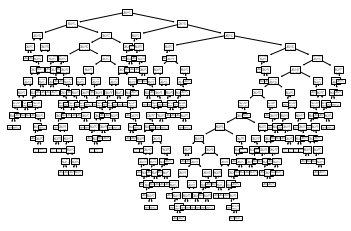

In [44]:
tree.plot_tree(dtree)

## Model evaluation

In [45]:
dtree.score(X_train, y_train)

0.9831460674157303

In [46]:
dtree.score(X_test, y_test)

0.7932960893854749

## Making predictions

In [47]:
X_train

,Pclass,Sex,Age,Fare
131,3,1,20.000000,7.0500
811,3,1,39.000000,24.1500
221,2,1,27.000000,13.0000
467,1,1,56.000000,26.5500
824,3,1,2.000000,39.6875
...,...,...,...,...
347,3,0,29.699118,16.1000
316,2,0,24.000000,26.0000
56,2,0,21.000000,10.5000
476,2,1,34.000000,21.0000


In [48]:
y_train

131    0
811    0
221    0
467    0
824    0
      ..
347    1
316    1
56     1
476    0
463    0
Name: Survived, Length: 712, dtype: int64

In [49]:
dtree.predict([[2, 0, 19, 26]])

array([1])

In [50]:
dtree.predict([[3, 1, 22, 7.25]])

array([0])

In [51]:
dtree.predict([[3, 1, 28, 16]])

array([0])

## Confusion matrix

In [52]:
from sklearn import metrics

In [53]:
cm = metrics.confusion_matrix(y_test, dtree.predict(X_test))
cm

array([[92, 14],
       [23, 50]])

In [54]:
import seaborn as sn
from matplotlib import pyplot as plt

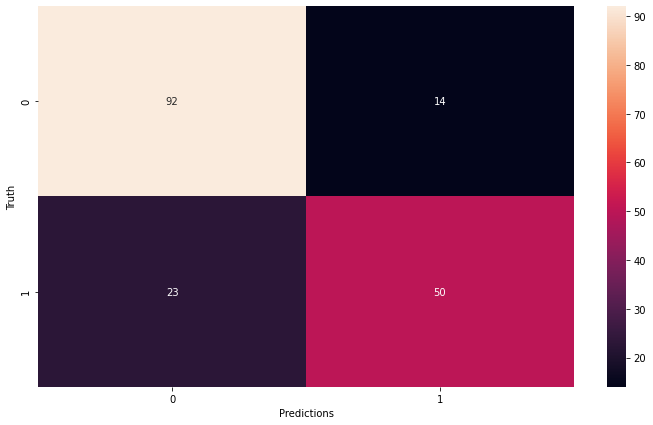

In [55]:
plt.figure(figsize=(12, 7))
sn.heatmap(cm, annot=True)
plt.ylabel("Truth")
plt.xlabel('Predictions')
plt.show()

Hope this was helpfull to you if yes, consider subscribing to [my youtube channel](https://www.youtube.com/channel/UCQf9BYcqr8pzKrY14ZyMsbg?view_as=subscriber). Thanks